In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

Loading the csv file into colab using pandas library

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Afame_Technologies_Churn_Modelling/Churn_Modelling.csv")

In [6]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
print(df.columns)

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [18]:
df.drop(columns = ['CustomerId','Surname','RowNumber'])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Checking if there are NULL values in the dataset

In [9]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df['Geography_encoded'].value_counts()

Geography_encoded
0    5014
1    2509
2    2477
Name: count, dtype: int64

Handling the categorical data.
Converting them into numerical data.
Here I used label encoding technique

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Geography_encoded'] = label_encoder.fit_transform(df['Geography'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

Dropping the unnecessary columns

In [21]:
df = df.drop(columns = ['CustomerId','Surname','RowNumber','Geography'])

In [22]:
df

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded
0,619,0,42,2,0.00,1,1,1,101348.88,1,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,2
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,0,36,7,0.00,1,0,1,42085.58,1,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1,1


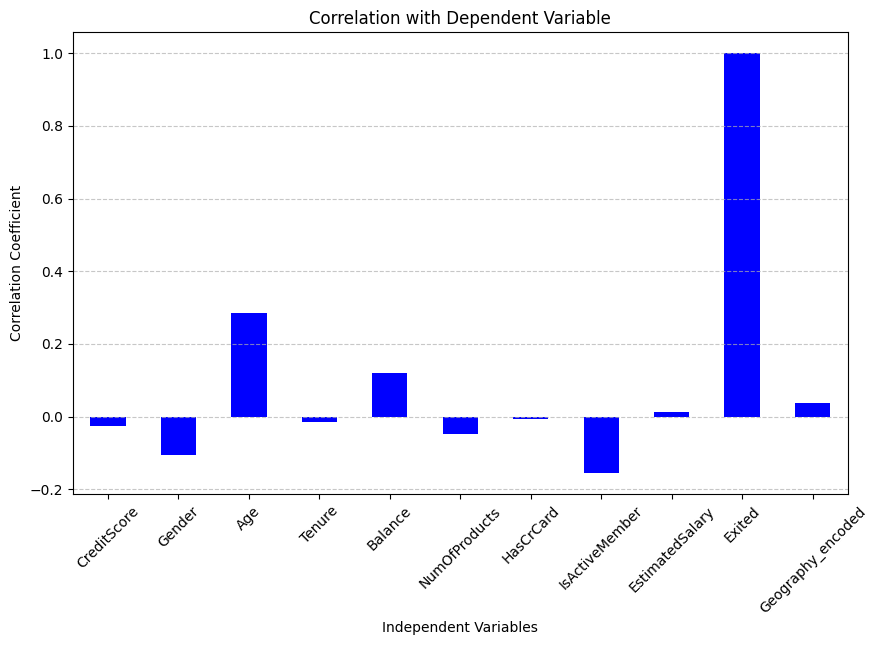

In [23]:
correlation = df.corrwith(df['Exited'])

# Plot correlation coefficients
plt.figure(figsize=(10, 6))
correlation.plot(kind='bar', color='blue')
plt.title('Correlation with Dependent Variable')
plt.xlabel('Independent Variables')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Plotting the Correlation matrix

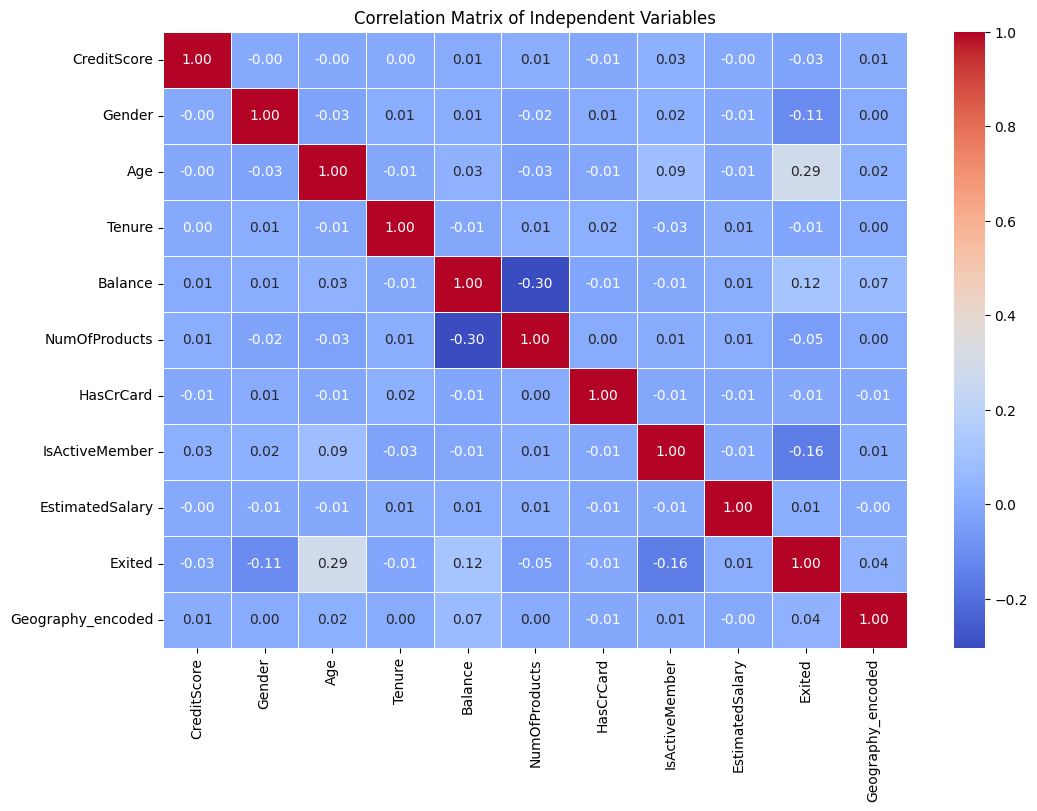

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Independent Variables')
plt.show()


isActiveMember and Gender are highly correlated to the Exited column

Defining the Independent columns and the target column

In [24]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [25]:
X

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_encoded
0,619,0,42,2,0.00,1,1,1,101348.88,0
1,608,0,41,1,83807.86,1,0,1,112542.58,2
2,502,0,42,8,159660.80,3,1,0,113931.57,0
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,2
...,...,...,...,...,...,...,...,...,...,...
9995,771,1,39,5,0.00,2,1,0,96270.64,0
9996,516,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,36,7,0.00,1,0,1,42085.58,0
9998,772,1,42,3,75075.31,2,1,0,92888.52,1


In [26]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

Splitting the data into training and testing data.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  0.97481699,
         1.36766974, -0.9055496 ],
       [-0.20389777,  0.91324755,  0.29493847, ...,  0.97481699,
         1.6612541 ,  0.30164867],
       [-0.96147213,  0.91324755, -1.41636539, ..., -1.02583358,
        -0.25280688,  1.50884694],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ..., -1.02583358,
        -0.1427649 , -0.9055496 ],
       [ 0.15932282,  0.91324755,  0.3900109 , ..., -1.02583358,
        -0.05082558, -0.9055496 ],
       [ 0.47065475,  0.91324755,  1.15059039, ...,  0.97481699,
        -0.81456811,  0.30164867]])

In [32]:
X_train_scaled.shape

(8000, 10)

In [40]:
X_test_scaled.shape

(2000, 10)

Training and evaluating the model on the test data
1.Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.815


2.Random Forest Classifier

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(X_train_scaled, y_train)

y_pred = rf_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8665


3.Gradient Boosting Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier


gb_classifier = GradientBoostingClassifier()

gb_classifier.fit(X_train_scaled, y_train)

y_pred = gb_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.866
